# Simple Linear Regression: Application

In this notebook, we examine how to apply simple linear regression in R on a sample dataset containing two variables—an individual's years of experience, and their salary.

Sources:
1. <a href='https://www.udemy.com/course/machinelearning/'>Machine Learning A-Z™: Hands-On Python & R In Data Science</a>
2. <a href='https://www.simplypsychology.org/p-value.html#:~:text=The%20smaller%20the%20p%2Dvalue,and%20the%20results%20are%20random)'>What a p-value tells you about statistical significance</a>

In [1]:
libraries <- c('ggplot2', 'caTools', 'patchwork')
lapply(libraries, library, character.only = TRUE)

[[1]]
[1] "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "caTools"   "ggplot2"   "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "patchwork" "caTools"   "ggplot2"   "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"

## Load & Preview Data

In [2]:
# Define data file path
salaies_file_path  <- file.path('Data', 'Salary_Data.csv')

# Load data
salaries <- read.csv(salaies_file_path)

In [3]:
cat('Shape:')
dim(salaries)
cat('Figure 1.')

cat('\n\nPreview:')
head(salaries, 5)
cat('Figure 2.')

cat('\n\nStructure:\n')
str(salaries)
cat('Figure 3.')

cat('\n\nSummary:')
summary(salaries)
cat('Figure 4.')

Shape:

[1] 30  2

Figure 1.

Preview:

,YearsExperience,Salary
,<dbl>,<dbl>
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891


Figure 2.

Structure:
'data.frame':	30 obs. of  2 variables:
 $ YearsExperience: num  1.1 1.3 1.5 2 2.2 2.9 3 3.2 3.2 3.7 ...
 $ Salary         : num  39343 46205 37731 43525 39891 ...
Figure 3.

Summary:

 YearsExperience      Salary      
 Min.   : 1.100   Min.   : 37731  
 1st Qu.: 3.200   1st Qu.: 56721  
 Median : 4.700   Median : 65237  
 Mean   : 5.313   Mean   : 76003  
 3rd Qu.: 7.700   3rd Qu.:100545  
 Max.   :10.500   Max.   :122391  

Figure 4.

## Prepare Data

In [4]:
# Set seed for consistent spitting results
set.seed(123)

# Define train-test split function

split <- sample.split(Y=salaries$Salary, SplitRatio=2/3)
# Split data
salaries_train <- subset(salaries, split == TRUE)
salaries_test <- subset(salaries, split==FALSE)

Note that the simple linear regression package we're using handles feature scaling; therefore, we do not need to manually perform the scaling step.

## Appling Linear Regression

In [5]:
# Define regressor
regressor  <- lm(formula= Salary ~ YearsExperience
                ,data=salaries_train)

By calling the summary function on our regressor object, we can view information such as the calculated slope and $y$-intercept.

For example, examine the Coefficients section.  At the far right, the Pr(|t|) column indicates the $p$-value.  When $p \leq 0.05$, the it is statistically significant, meaning that the independent and dependent variables are related, or that the independent variables does indeed affect the dependent variable.$^2$  Additionally, just beside this we see three stars.  Possible star counts can range from no stars—indicating no statistical significance—to three stars—indicating high statistical significance.

Before even plotting our data, we can already tell that there is a strong linear relationship between years of experience and salary.



In [6]:
# Summarize regressor
summary(regressor)


Call:
lm(formula = Salary ~ YearsExperience, data = salaries_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


## Predict Salaries

In [7]:
# Define training set predictions
y_predict <- predict(regressor, newdata=salaries_test)
y_predict

2         4         5         8        11        16        20        21 
 37766.77  44322.33  46195.35  55560.43  62115.99  71481.07  81782.66  89274.72 
       24        26 
102385.84 109877.90

## Visualize Results

In [8]:
# Predict test label
y_train_ression_line <- predict(regressor, newdata=salaries_train)

When we visualize our data, we will first plot our known salaries from the training set with a scatter plot, then plot our regression line to examine how close it is to the actual points.

Both plots use the same input for the $x$-axis—our training years of experience.  The input for the $y$-axis will differ however.  For known values on the scatter plot, we plot the actual points, and for the regression line plot, the regression line itself will be our input.

When repeating the above for the testing set, the regression line inputs will be the same.  On both graphs, we are plotting the same regression line that we trained using training data, and then predicted values with on the testing set.

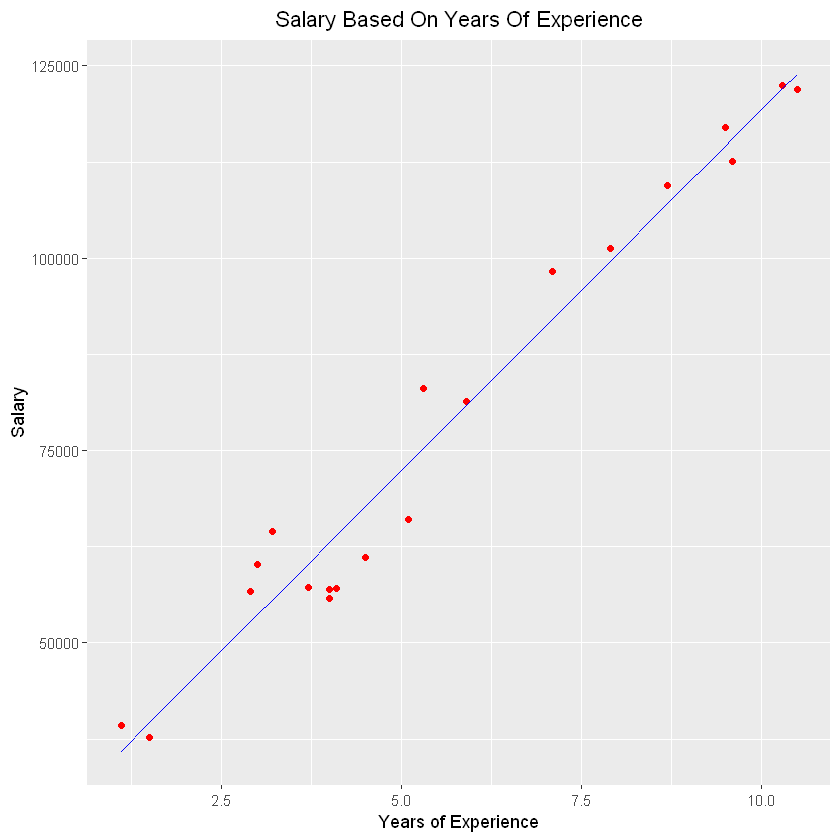

In [9]:
# Plot training data
ggplot() +
  geom_point(aes(x=salaries_train$YearsExperience, y=salaries_train$Salary) # Add training points as scatter plot
            ,color='red') +
  geom_line(aes(x = salaries_train$YearsExperience, y=y_train_ression_line) # Add regression line
           ,color='blue') +
  ggtitle('Salary Based On Years Of Experience') +
  theme(plot.title = element_text(hjust=0.5)) + # Center title
  xlab('Years of Experience') +
  ylab('Salary')

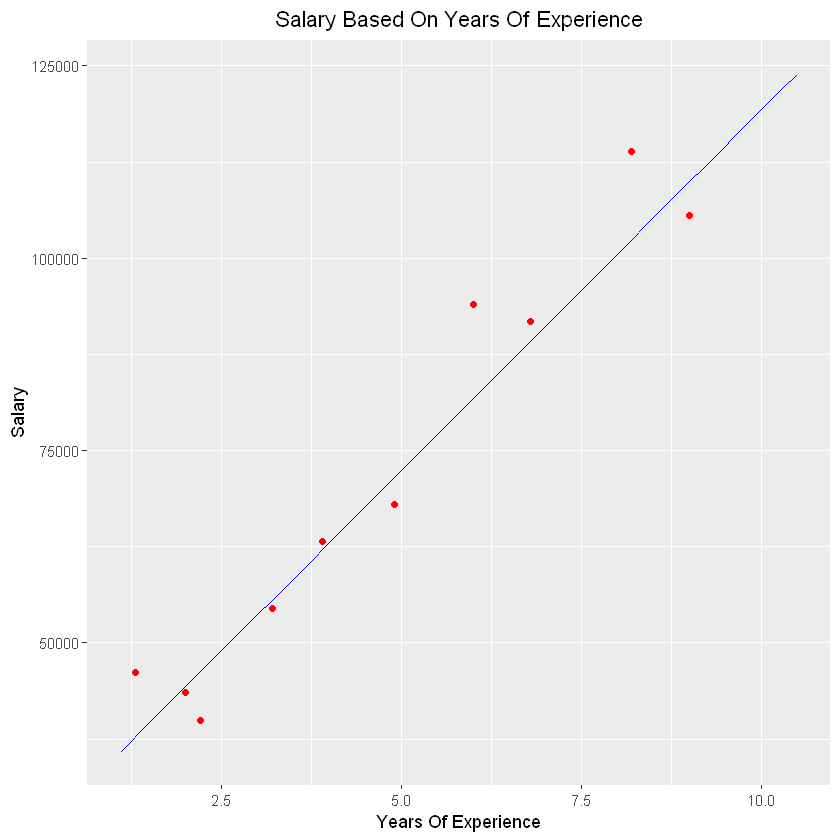

In [10]:
# Plot testing data
ggplot() +
  geom_point(aes(x=salaries_test$YearsExperience, y=salaries_test$Salary) # Add testing points as scatter plot
            ,color='red') +
  geom_line(aes(salaries_train$YearsExperience, y=y_train_ression_line)# Add regression line
           ,color='blue') +
  ggtitle('Salary Based On Years Of Experience') +
  theme(plot.title = element_text(hjust=0.5)) + # Center title
  xlab('Years Of Experience') +
  ylab('Salary')

## Parking Lot Notes

Figure out how to plot side by side without making both plots really small.

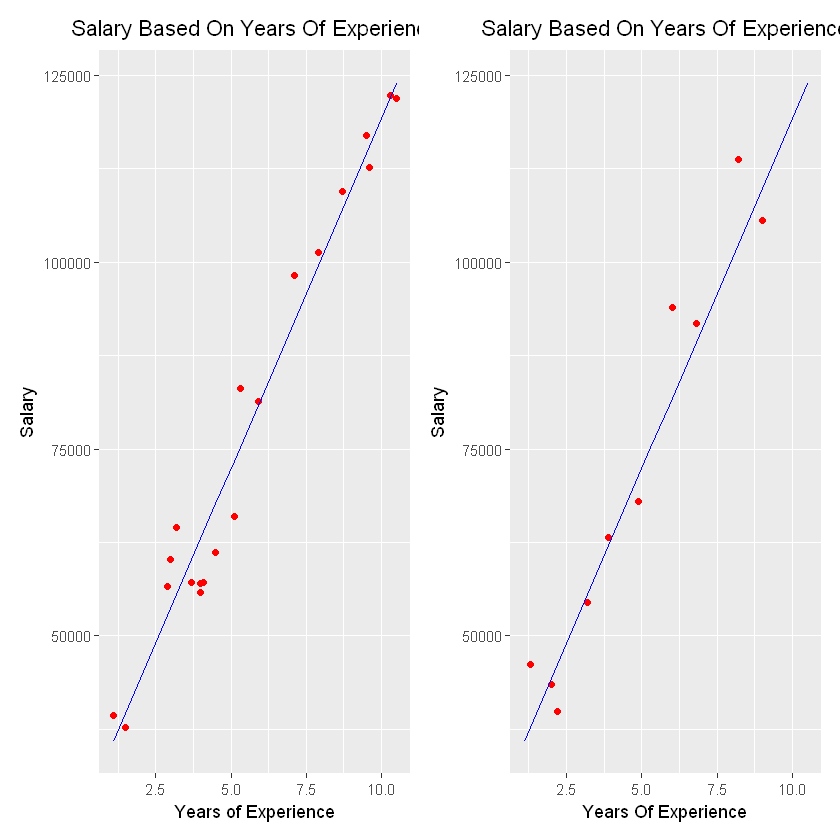

In [11]:
# Plot training data
plot_training <- ggplot() +
  geom_point(aes(x=salaries_train$YearsExperience, y=salaries_train$Salary) # Add training points as scatter plot
            ,color='red') +
  geom_line(aes(x = salaries_train$YearsExperience, y=y_train_ression_line) # Add regression line
           ,color='blue') +
  ggtitle('Salary Based On Years Of Experience') +
  theme(plot.title = element_text(hjust=0.5)) + # Center title
  xlab('Years of Experience') +
  ylab('Salary')

# Plot testing data
plot_testing <- ggplot() +
  geom_point(aes(x=salaries_test$YearsExperience, y=salaries_test$Salary) # Add testing points as scatter plot
            ,color='red') +
  geom_line(aes(salaries_train$YearsExperience, y=y_train_ression_line)# Add regression line
           ,color='blue') +
  ggtitle('Salary Based On Years Of Experience') +
  theme(plot.title = element_text(hjust=0.5)) + # Center title
  xlab('Years Of Experience') +
  ylab('Salary')

# Plot side-by-side using the patchwork library
plot_training + plot_testing